<a href="https://colab.research.google.com/github/Valeram12/neural-networks/blob/main/lab8/lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.0 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, regularizers

df = pd.read_csv("https://raw.githubusercontent.com/Valeram12/neural-networks/refs/heads/main/lab6/fonts.csv")
df

,font,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,TIMES,1,1,9,59,129,185,255,219,1,...,29,99,99,141,239,227,157,143,34,1
1,ARIAL,1,1,1,1,1,94,186,255,255,...,1,1,1,1,1,94,244,255,244,94
2,CALIBRI,1,1,66,255,255,255,229,1,1,...,1,1,1,1,1,1,1,1,1,1
3,TIMES,1,1,1,1,255,255,255,255,255,...,171,1,1,1,1,1,1,1,1,1
4,ARIAL,1,1,1,1,1,1,1,1,1,...,1,242,255,255,255,203,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47548,TIMES,1,1,1,1,1,1,1,19,184,...,96,7,1,1,1,1,1,1,1,1
47549,NUMERICS,1,1,1,1,1,255,255,255,255,...,1,1,1,1,1,1,1,1,1,1
47550,NUMERICS,1,1,128,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
47551,ARIAL,41,50,92,103,121,151,176,200,209,...,211,222,224,231,231,231,222,217,173,163


In [3]:
def plot_training_history(history_data):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].plot(history_data['accuracy'], label='Training Accuracy')
    axes[0].plot(history_data['val_accuracy'], label='Validation Accuracy')
    axes[0].set_title('Model Accuracy')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].legend(loc='upper left')

    axes[1].plot(history_data['loss'], label='Training Loss')
    axes[1].plot(history_data['val_loss'], label='Validation Loss')
    axes[1].set_title('Model Loss')
    axes[1].set_ylabel('Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].legend(loc='upper left')

    plt.tight_layout()
    plt.show()


def fit_model_and_plot(model, num_epochs, batch_size, existing_history=None):
    new_history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

    if existing_history:
        for metric, values in new_history.history.items():
            existing_history.setdefault(metric, []).extend(values)
        combined_history = existing_history
    else:
        combined_history = new_history.history

    plot_training_history(combined_history)


In [4]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

X_reshaped = X.values.reshape(-1, 20, 20, 1) / 255.0

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = pd.get_dummies(y_encoded)
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_onehot, test_size=0.2, random_state=42)

In [19]:

cnn = models.Sequential()

cnn.add(layers.Input(shape=(20, 20, 1)))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(256, activation='relu'))
cnn.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = {}


Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 180ms/step - accuracy: 0.8892 - loss: 0.2671 - val_accuracy: 0.8299 - val_loss: 0.4464
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 182ms/step - accuracy: 0.8916 - loss: 0.2619 - val_accuracy: 0.8370 - val_loss: 0.3935
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 182ms/step - accuracy: 0.8984 - loss: 0.2476 - val_accuracy: 0.8350 - val_loss: 0.4396
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 175ms/step - accuracy: 0.8941 - loss: 0.2585 - val_accuracy: 0.8462 - val_loss: 0.3873
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 180ms/step - accuracy: 0.9020 - loss: 0.2387 - val_accuracy: 0.8390 - val_loss: 0.3971
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 177ms/step - accuracy: 0.9070 - loss: 0.2278 - val_accuracy: 0.8320 - val_loss: 0.4613
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 179ms/step - accuracy: 0.9055 - loss: 0.2353 - val_accuracy: 0.8477 - val_loss: 0.4085
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 182ms/step - accuracy: 0.9139 - loss: 0.2090 - val_accu

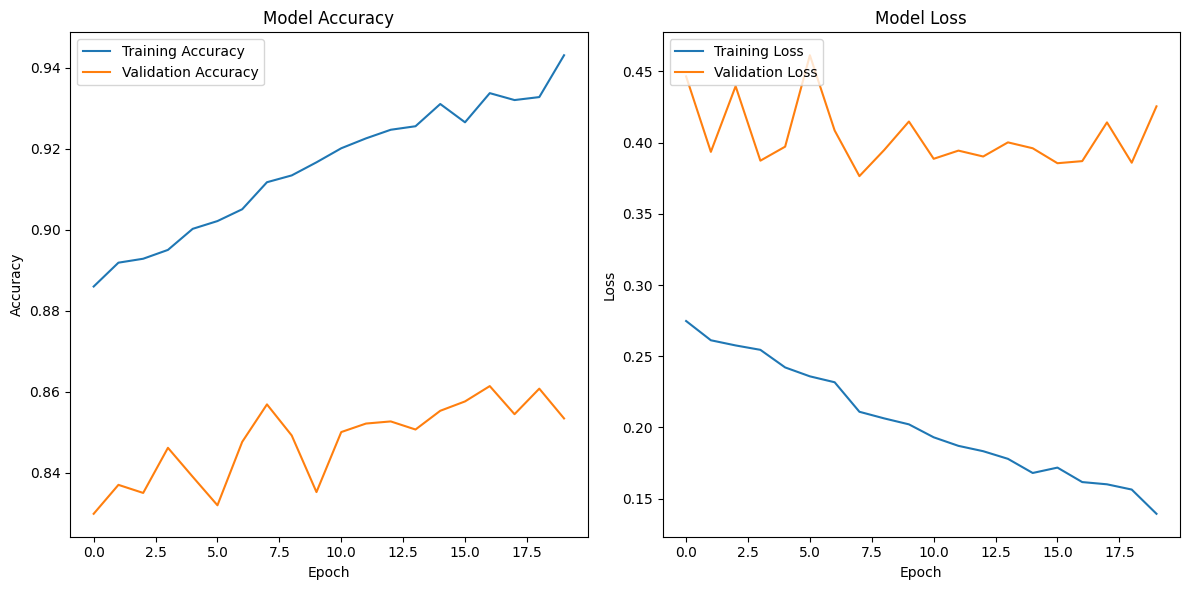

In [21]:
fit_model_and_plot(cnn, 20, 512, history)

In [22]:
import numpy as np
import gradio as gr
from skimage import transform


def convert_rgb_to_grayscale(image_rgb):
    grayscale_image = np.mean(image_rgb, axis=-1, keepdims=True)
    resized_image = transform.resize(grayscale_image, (1, 20, 20, 1), mode='constant')
    return resized_image

def predict_font(image):
    prediction_output = cnn.predict(convert_rgb_to_grayscale(image))
    sorted_results = sorted(enumerate(prediction_output[0]), key=lambda x: x[1], reverse=True)
    formatted_labels = [f"{label_encoder.classes_[index]} - {probability:.2%}" for index, probability in sorted_results]

    best_match_index = np.argmax(prediction_output)
    return label_encoder.classes_[best_match_index], "\n".join(formatted_labels)

In [23]:
input_img = gr.Image()
demo = gr.Interface(predict_font, input_img, ["label", 'text'])
demo.launch(show_api=False, share=True, )

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://43bc0b6279b6da871e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
